1. Project:  Data Visualization

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_population_raw = pd.read_csv('population_total.csv')

In [6]:
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [10]:
# delete null values
df_population_raw.dropna(inplace=True)

# delete duplicates
df_population_raw.drop_duplicates(inplace=True)

In [14]:
# create pivot table
df_pivot = df_population_raw.pivot(
    index='year',
    columns='country',
    values='population'
)

In [16]:
# select countries
df_pivot = df_pivot[['United States', 'India', 'Chile', 'Brazil', 'Indonesia']]

In [17]:
df_pivot

country,United States,India,Chile,Brazil,Indonesia
year,,,,,
1955.0,171685336.0,4.098806e+08,7322652.0,62533919.0,77273425.0
1960.0,186720571.0,4.505477e+08,8132990.0,72179226.0,87751068.0
1965.0,199733676.0,4.991233e+08,8989621.0,83373530.0,100267062.0
1970.0,209513341.0,5.551898e+08,9783134.0,95113265.0,114793178.0
1975.0,219081251.0,6.231029e+08,10592307.0,107216205.0,130680727.0
1980.0,229476354.0,6.989528e+08,11419348.0,120694009.0,147447836.0
1985.0,240499825.0,7.843600e+08,12257236.0,135274080.0,164982451.0
1990.0,252120309.0,8.732778e+08,13274623.0,149003223.0,181413402.0
1995.0,265163745.0,9.639226e+08,14380866.0,162019896.0,196934260.0


1.1 Lineplot - Grafico de Linea

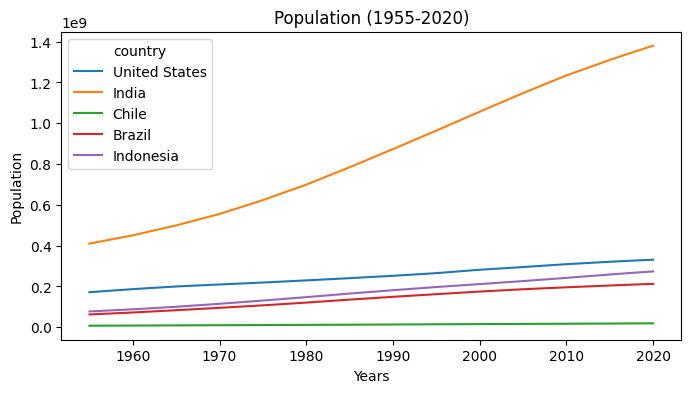

In [77]:
df_pivot.plot(kind='line', xlabel='Years', ylabel='Population', title='Population (1955-2020)', figsize=(8,4))

# import data
plt.savefig('Lineplot_test.png')
plt.show()

In [78]:
# export pivot table
df_pivot.to_excel('pivot_table_test.xlsx')

1.2 Barplot - Grafico de Caja

In [29]:
# select year - 2020
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [30]:
df_pivot_2020

country,United States,India,Chile,Brazil,Indonesia
year,,,,,
2020.0,331002651.0,1.380004e+09,19116201.0,212559417.0,273523615.0


In [32]:
# transpose dataframe
df_pivot_2020 = df_pivot_2020.T

<Axes: title={'center': 'Population in 2020'}, xlabel='Countries', ylabel='Population'>

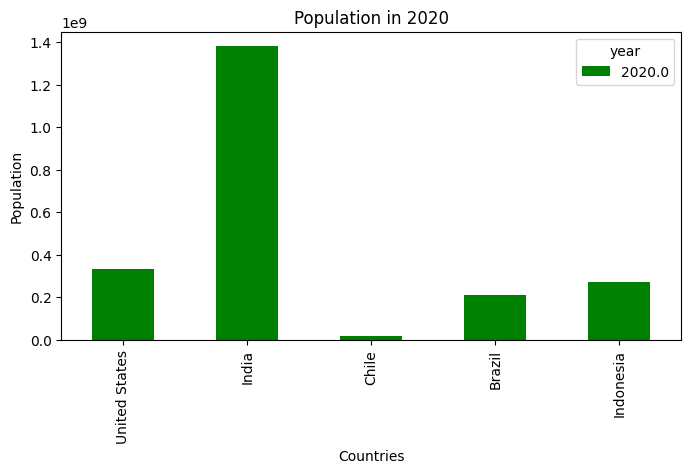

In [37]:
# barplot
df_pivot_2020.plot(kind='bar', color='green', xlabel='Countries', ylabel='Population', title='Population in 2020', figsize=[8,4])

In [39]:
# barplot with n varibles
## select years
df_pivot_sample = df_pivot[df_pivot.index.isin([1980,1990,2000,2010,2020])]

In [43]:
df_pivot_sample = df_pivot_sample.T

<Axes: title={'center': 'Population in 2020'}, xlabel='Countries', ylabel='Population'>

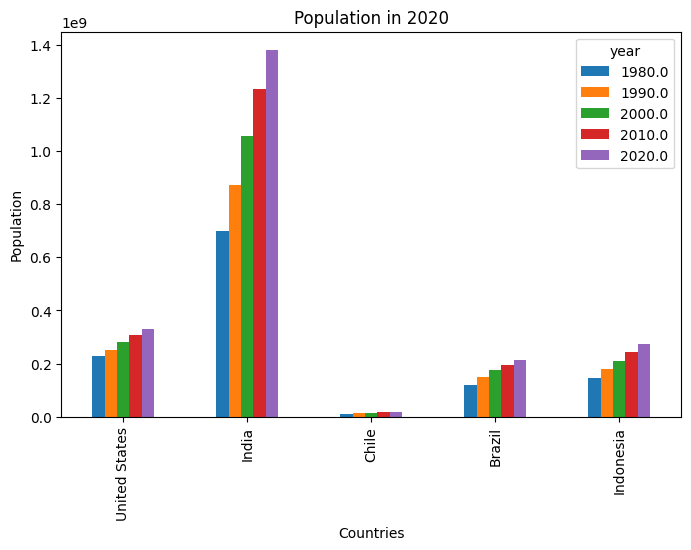

In [46]:
df_pivot_sample.plot(kind='bar', xlabel='Countries', ylabel='Population', title='Population in 2020', figsize=[8,5])

1.3 Piechart

In [48]:
# change name column
df_pivot_2020.rename(columns={2020:'2020'}, inplace=True)

<Axes: title={'center': 'Population in 2020(%)'}, ylabel='2020'>

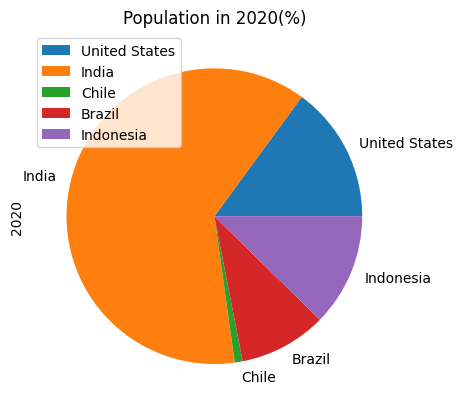

In [56]:
df_pivot_2020.plot(kind='pie', y='2020', title='Population in 2020(%)')

1.4 Boxplot

<Axes: ylabel='Population'>

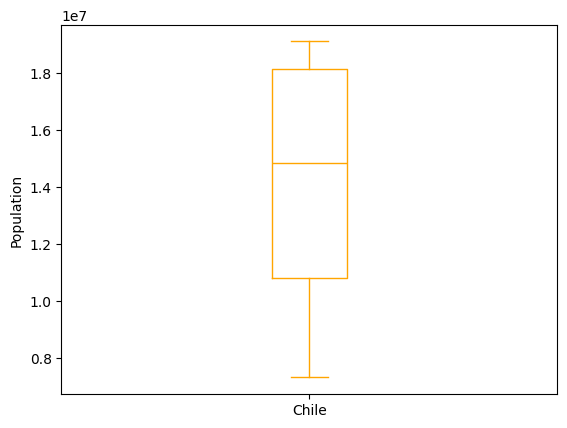

In [61]:
df_pivot['Chile'].plot(kind='box', color='orange', ylabel='Population')

<Axes: xlabel='Countries', ylabel='Population'>

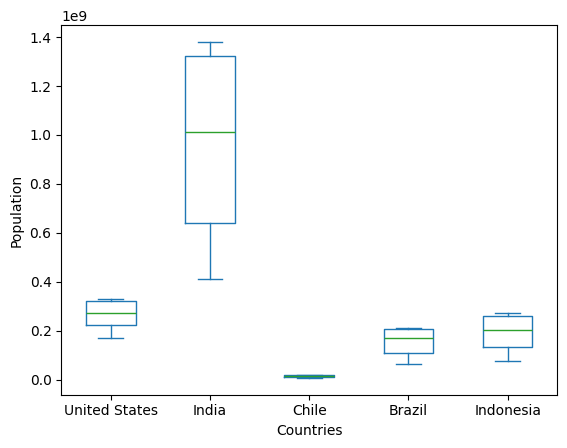

In [63]:
# multiple boxplot
df_pivot.plot(kind='box', xlabel='Countries', ylabel='Population')

1.5 Histogramas

<Axes: ylabel='Frequency'>

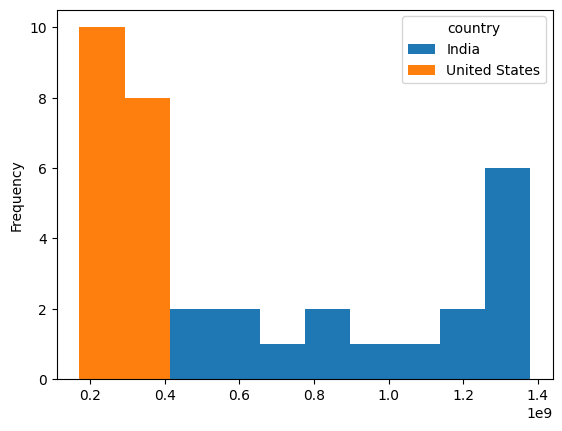

In [66]:
df_pivot[['India', 'United States']].plot(kind='hist')

1.6 ScatterPlot - Grafico de dispersion

In [71]:
# select a sample the data
df_sample = df_population_raw[df_population_raw['country'].isin(['China', 'India', 'Japon', 'Taiwan', 'Russia'])]

<Axes: xlabel='year', ylabel='population'>

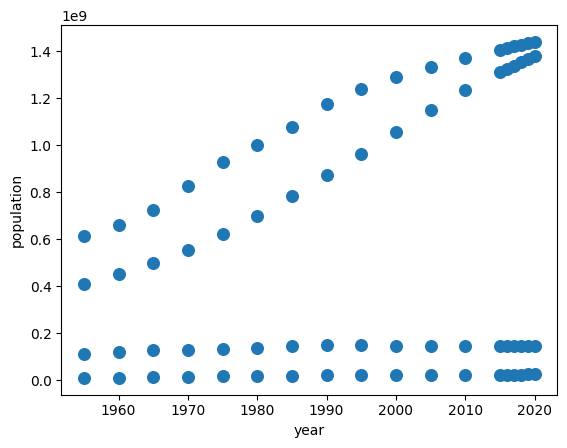

In [74]:
df_sample.plot(kind='scatter', x='year', y='population', s=70)